# 10 Academy: Artificial Intelligence Mastery
## Situational Overview
## Satisfaction Analysis
Ethel Cherotaw 

In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
import psycopg2

# Add the scripts directory to the Python path
scripts_dir = r'E:\2017.Study\Tenx\Week-2\Situation_Overview\W2.Situation_Overview-\scripts'
src_dir = r'E:\2017.Study\Tenx\Week-2\Situation_Overview\W2.Situation_Overview-\src'
sys.path.append(scripts_dir)
sys.path.append(src_dir)
from connection import DatabaseConnector
from utils import DataUtils

## 1.1 Data Extraction

Connect to the database and pandas.

In [2]:
db_connector = DatabaseConnector()

# Connect to the database
db_connector.connect()

# Define and execute a query
query = "SELECT * FROM xdr_data;"
df = db_connector.execute_query(query)

# Print the DataFrame
#if df is not None:
    #print(df)
db_connector.close_connection()
#print("Columns in DataFrame:", df.columns)

Connection successful.
Connection closed.


## 1.2 Data Cleansing
Missing Value, Outliers, and data conversion

#### 1.3 Handling Missing Value,
Outliers , Fix( Median, Mean) and Remove Outliers Based on Z Score

handles skewness in the handle_missing_values method, where it decides whether to fill missing values with the median or mean based on the skewness of the distribution of the numeric columns.

In [3]:
data_utils = DataUtils(df)
missing_summary = data_utils.check_missing_values()
#print("Missing Values Summary:\n", missing_summary)

Total columns with missing values: 41
Top 5 columns with the most missing values:
                                          Missing Values Percentage    Dtype
Nb of sec with 37500B < Vol UL                    130254      86.8%  float64
Nb of sec with 6250B < Vol UL < 37500B            111843      74.6%  float64
Nb of sec with 125000B < Vol DL                    97538      65.0%  float64
TCP UL Retrans. Vol (Bytes)                        96649      64.4%  float64
Nb of sec with 31250B < Vol DL < 125000B           93586      62.4%  float64


In [4]:
df = data_utils.handle_missing_values()
#df.head()

outliers = data_utils.detect_outliers()

for column, outlier_indices in outliers.items():
    print(f"Outliers in column '{column}': {outlier_indices[:3]}")  # Show first 5 outlier indices

df = data_utils.fix_outliers()
df = data_utils.remove_outliers()
#df.head()
df = data_utils.convert_bytes_to_megabytes()

Missing values handled and high missing value columns dropped.
Outlier detection complete.
Outliers in column 'Bearer Id': Index([], dtype='int64')
Outliers in column 'Start ms': Index([], dtype='int64')
Outliers in column 'End ms': Index([], dtype='int64')
Outliers in column 'Dur. (ms)': Index([0, 1, 2], dtype='int64')
Outliers in column 'IMSI': Index([27541, 100027, 125042], dtype='int64')
Outliers in column 'MSISDN/Number': Index([125042, 126060], dtype='int64')
Outliers in column 'IMEI': Index([], dtype='int64')
Outliers in column 'Avg RTT DL (ms)': Index([467, 505, 516], dtype='int64')
Outliers in column 'Avg RTT UL (ms)': Index([58, 72, 184], dtype='int64')
Outliers in column 'Avg Bearer TP DL (kbps)': Index([86, 323, 405], dtype='int64')
Outliers in column 'Avg Bearer TP UL (kbps)': Index([132, 317, 331], dtype='int64')
Outliers in column 'TCP DL Retrans. Vol (Bytes)': Index([538, 786, 902], dtype='int64')
Outliers in column 'TCP UL Retrans. Vol (Bytes)': Index([566, 821, 1246],

## 2. Satisfaction Analysis

### Engagement Score 

In [5]:
data_utils.analyze_customer_engagement()
df_with_clusters, kmeans_model = data_utils.perform_kmeans_clustering(k=3)
df_with_engagement_scores = data_utils.calculate_engagement_scores()
# View the first few rows to check the engagement scores
#print(df_with_engagement_scores.columns)

print(df_with_engagement_scores[['Cluster', 'Engagement_score']].head())

Metrics normalized.
Cluster centers:
 [[-1.41393603e-03  8.27890267e-01  5.26358787e-01  8.27890267e-01
   5.26358787e-01]
 [-4.67974390e-04  6.76521897e-02 -1.20578710e+00  6.76521897e-02
  -1.20578710e+00]
 [ 1.99592968e-03 -9.93605525e-01  4.27650955e-01 -9.93605525e-01
   4.27650955e-01]]
Number of customers in each cluster:
 Cluster
0    41696
2    36930
1    31278
Name: count, dtype: int64
Least engaged cluster: 1
Centroid of least engaged cluster: [-4.67974390e-04  6.76521897e-02 -1.20578710e+00  6.76521897e-02
 -1.20578710e+00]
   Cluster  Engagement_score
0        2          1.541934
1        0          3.889137
2        1          1.089541
3        0          2.189521
4        0          1.686843


### Experience score 

In [10]:
data_utils.scale_numeric_data()
data_utils.apply_kmeans_clustering(n_clusters=3)
# Calculate experience scores

df_with_experience_scores = data_utils.calculate_experience_scores()
#print("Columns in df_with_experience_scores:", df_with_experience_scores.columns)
print(df_with_experience_scores[['Cluster', 'Experience_score']].head())

Scaled Data Shape: (109904, 73)
Scaled Data Sample: [[ 1.23311792  1.09837529  0.69770786 -0.21327691  0.03692713 -0.04832504
  -0.32231783 -0.07924303 -0.07884529 -0.36036298 -0.366602    0.07378031
   0.13516181  0.35181508 -0.33264417 -0.27603464 -0.22300304  0.3382253
  -0.2431255   0.          0.         -0.05123598  0.0521183  -0.24412362
  -0.25899123 -0.21326856  0.22734893  0.26788934  0.25310866  0.03490712
   0.27272598  0.17603874 -0.26347152 -0.25269325 -0.1722073  -0.3944506
  -1.25241814 -0.6256968   0.09075736 -1.22803523  0.76970395 -1.36115031
  -0.46036523 -0.13891605 -0.55171661  1.45485879 -1.01313674  0.21387248
  -0.32635957 -0.5590399   0.07378031  0.13516181 -0.05123598  0.0521183
  -0.1722073  -0.3944506  -1.25241814 -0.6256968   0.09075736 -1.22803523
   0.76970395 -1.36115031 -0.46036523 -0.13891605 -0.55171661  1.45485879
  -1.01313674  0.21387248 -0.32635957 -0.5590399  -1.10157811 -1.10844393
  -0.74215823]
 [ 1.23311793 -0.90250656  0.48814948 -0.2132769

In [7]:
df_engagement = df_with_engagement_scores[['MSISDN', 'Engagement_score']]
# Select relevant columns from df_with_experience_scores
df_experience = df_with_experience_scores[['MSISDN', 'Experience_score']]
# Merge the DataFrames on 'MSISDN'
merged_df = pd.merge(df_engagement, df_experience, on='MSISDN')

In [8]:
print("Sample data from merged_df:\n", merged_df.head())

Sample data from merged_df:
          MSISDN  Engagement_score  Experience_score
0  3.366496e+10          1.541934          9.567563
1  3.368185e+10          3.889137         10.499601
2  3.368185e+10          3.889137         10.660020
3  3.376063e+10          1.089541         10.502235
4  3.375034e+10          2.189521         10.541854


### Report Top 10 Satisfied Customers

In [9]:
# Calculate the Satisfaction_score as the average of Engagement_score and Experience_score
merged_df['Satisfaction_score'] = (merged_df['Engagement_score'] + merged_df['Experience_score']) / 2
# Sort the DataFrame by Satisfaction_score in descending order and select the top 10
top_10_satisfied_customers = merged_df.sort_values(by='Satisfaction_score', ascending=False).head(10)

# Display the results
print("Top 10 Satisfied Customers:\n", top_10_satisfied_customers[['MSISDN', 'Satisfaction_score']])


Top 10 Satisfied Customers:
                 MSISDN  Satisfaction_score
23065271  3.369574e+10           19.672304
23018881  3.366646e+10           18.779263
41375074  3.365927e+10           18.624579
40811053  3.376356e+10           18.085459
730068    3.366698e+10           18.058534
11985780  3.366007e+10           17.902248
22216218  3.376026e+10           17.900187
35041069  3.366316e+10           17.889544
37763403  3.366371e+10           17.832884
41468089  3.366839e+10           17.810651


In [11]:
# Select only the necessary columns
Merged_Re_df = merged_df[['MSISDN', 'Engagement_score', 'Experience_score', 'Satisfaction_score']]
Merged_Re_df.head()
#Merged_Re_df.to_csv(r'E:\2017.Study\Tenx\Week-2\Data\Merged_Re_df.csv', index=False)



,MSISDN,Engagement_score,Experience_score,Satisfaction_score
0,3.366496e+10,1.541934,9.582069,5.562002
1,3.368185e+10,3.889137,10.512556,7.200846
2,3.368185e+10,3.889137,10.673178,7.281157
3,3.376063e+10,1.089541,10.516003,5.802772
4,3.375034e+10,2.189521,10.554859,6.372190


### Build a Regression Model to Predict Satisfaction Score

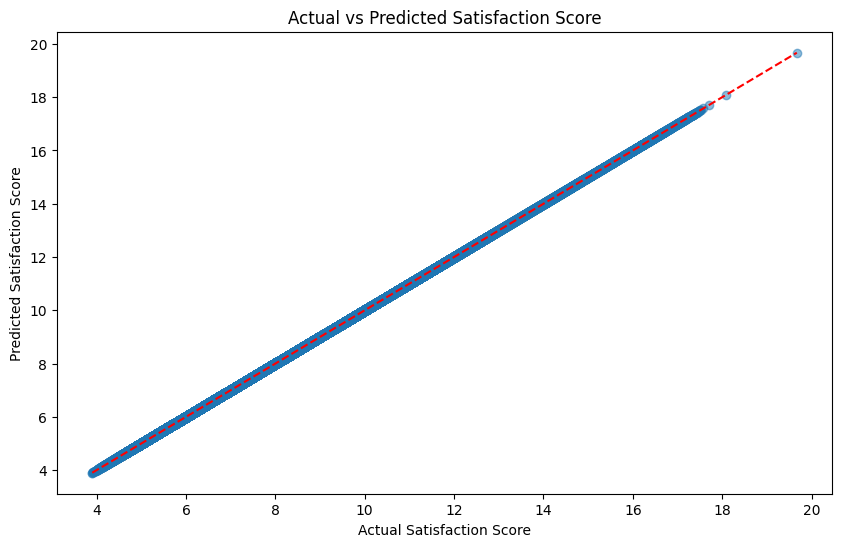

In [14]:
data_utils = DataUtils(Merged_Re_df)
# Preprocess the data
data_utils.preprocess_data()
# Train the model and get predictions
model, predictions_df = data_utils.train_and_predict_model()
# Plot the predictions vs actual values
data_utils.plot_predictions_vs_actual(predictions_df)
# Save predictions to a CSV file
# predictions_df.to_csv(r'E:\2017.Study\Tenx\Week-2\Data\predictions_with_msisdn.csv', index=False)

In [13]:
data_utils = DataUtils(Merged_Re_df)
# Run K-means clustering (k=2)
cluster_centers = data_utils.run_kmeans_clustering(n_clusters=2)
print("Cluster Centers:", cluster_centers)
# Visualize the clusters
data_utils.visualize_clusters()

### Export Data to DB 

In [7]:
csv_file_path = r'E:\2017.Study\Tenx\Week-2\Data\Merged_Re_df.csv'
Merged_Re_df = pd.read_csv(csv_file_path)
# Initialize the DataUtils class with the DataFrame
data_utils = DataUtils(Merged_Re_df)
# Export the DataFrame to PostgreSQL
db_name = 'merged_data_db'
db_user = 'postgres'
db_password = 'admin'
db_host = 'localhost'
db_port = '5432'
table_name = 'merged_data_table'   
data_utils.export_to_postgresql(db_name, db_user, db_password, db_host, db_port, table_name)

### 